You need to use the one-dimensional heat equation with boundary conditions and initial condition from previous Task 3:

Our goal is to:

1. Forward Problem: Solve the heat equation using FDM (Euler or Thomas methods) to find the temperature distribution u(x,T) at a later time T given the initial condition f(x).
2. Dataset Generation:
    Simulate the forward model (heat equation) to obtain the temperature distribution at time T.
    Add noise to the simulated data to simulate noisy observations.

    This gives us pairs (u_noisy, f) , where u_noisy​ is the noisy temperature at time T and f is the initial temperature distribution.

3. Neural Network Model:
    Use a simple feedforward neural network to approximate the inverse mapping f=f_θ(u_noisy). The input to the network is the noisy temperature distribution u_noisy​, and the output is the predicted initial temperature distribution f_θ​.
            a) Input: Noisy temperature distribution u_noisy​.
            b) Output: Predicted initial temperature distribution f_θ​

4. Loss Function:

    Minimize the Mean Squared Error (MSE) + Regularization part between the predicted and true initial temperature distributions.

    Use optimization method (for example the Adam optimizer) to update the weights of the neural network.

PS: Feel free to play with hyperparameters: number of points, learning rate coefficient, number of epochs, regularization parameter etc.

### Heat equation:
∂u(x,t) / ∂t = α * ( ∂^2^u(x,t) / ∂x^2^ ) + f(x, t)
f(x, t) - external influence
α - coefficient of thermal conductivity (constant)
u(x,t) - temperature at point x at time t
where x = [0, L], t = [0, T]

### Boundary condition:
u(0, t) = u(L, t) = 0 (when x = 0 and x = L temperature is equal to 0)

### Initial condition:
u(x, 0) = f(x) - so, i don't understand it normally (the temperature distribution f(x) along the rod at time t = 0)

### CMF condition:
 r = α * dt / dx^2^

### Spatial Diser:
 dx = L / n - 1,
 where n - amount of step in grid (or space)? or amount of points

### Time Diser:
 dt = T / m - 1 (I'm not sure about m - 1, think we don't need to subtract 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### From task 3

In [2]:
T = 0.1 # time of modeling
L = 1.0 # lentgth of stick
alpha = 0.01 # k / c * ro
noise_level = 0.05 # noise of order 2 * 10^-2
lambda_reg = 0.5
Nx = 50
Nt = 100
dx = L / (Nx - 1) # step X (Horizontal)
dt = T / Nt # step T (Vertical)
learning_rate = 0.001
num_epochs = 500

### Initial function:
    f(x) = sin(Pi * X)

In [3]:
def fun(x):
    return np.sin(np.pi * x)

### Grid Method:
construct the grid over the domain = (0, L) * (0, T)

In [4]:
print(f"dx: {dx}, dt: {dt}")

dx: 0.02040816326530612, dt: 0.001


In [5]:
r = alpha * dt / dx**2

### We need some condition for CMF (r):

by CFL condition r <= 0.5
so



In [6]:
if r > 0.5:
    print("CFL condition not approved")
else:
    print(f"{r} < or = 0.5")

0.024010000000000007 < or = 0.5


### Construct grid

In [7]:
x = np.linspace(0, L, Nx)
x

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

### Euler Method

In [8]:
u = np.zeros((Nt, Nx))  # Our array function
u

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
u[0, :] = fun(x) # Function when t=0
u

array([[0.00000000e+00, 6.40702200e-02, 1.27877162e-01, ...,
        1.27877162e-01, 6.40702200e-02, 1.22464680e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## Euler method:

u<sub>n + 1, i</sub> = u<sub>n, i</sub> + alpha * (dt / dx^2^) * (u<sub>n, i - 1</sub> - 2 * u<sub>n, i</sub> + u<sub>n, i + 1</sub>)


In [10]:
for n in range(0, Nt - 1):
    for i in range(1, Nx - 1):
        u[n + 1, i] = u[n, i] + alpha * dt / dx**2 * (u[n, i - 1] - 2 * u[n, i] + u[n, i + 1])

In [11]:
u

array([[0.00000000e+00, 6.40702200e-02, 1.27877162e-01, ...,
        1.27877162e-01, 6.40702200e-02, 1.22464680e-16],
       [0.00000000e+00, 6.40638987e-02, 1.27864545e-01, ...,
        1.27864545e-01, 6.40638987e-02, 0.00000000e+00],
       [0.00000000e+00, 6.40575780e-02, 1.27851930e-01, ...,
        1.27851930e-01, 6.40575780e-02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 6.34599476e-02, 1.26659125e-01, ...,
        1.26659125e-01, 6.34599476e-02, 0.00000000e+00],
       [0.00000000e+00, 6.34536864e-02, 1.26646628e-01, ...,
        1.26646628e-01, 6.34536864e-02, 0.00000000e+00],
       [0.00000000e+00, 6.34474260e-02, 1.26634133e-01, ...,
        1.26634133e-01, 6.34474260e-02, 0.00000000e+00]])

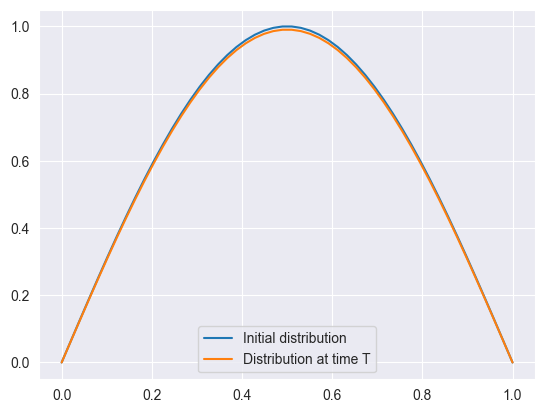

In [12]:
plt.plot(x, u[0, :], label='Initial distribution')
plt.plot(x, u[-1, :], label='Distribution at time T')
plt.legend()
plt.show()

## Add some noise

In [13]:
u_noisy = u[-1, :] + noise_level * np.random.randn(Nx)
u_noisy

array([-0.06126656,  0.01603757,  0.12883915,  0.20077883,  0.18857726,
        0.30030148,  0.47404994,  0.43357313,  0.5831407 ,  0.55277325,
        0.59989625,  0.6719125 ,  0.71388176,  0.71272199,  0.77135781,
        0.82490996,  0.85086231,  0.96088013,  0.90109433,  0.8816851 ,
        0.9678953 ,  0.87420976,  0.92146436,  1.03506817,  0.99665292,
        1.08127239,  1.02200162,  1.02164511,  0.91851686,  1.01856581,
        0.94345721,  0.87984626,  0.83013156,  0.86012936,  0.84549826,
        0.7684548 ,  0.69758117,  0.67175861,  0.64515308,  0.63783969,
        0.54809347,  0.42014168,  0.45685355,  0.41658545,  0.30799799,
        0.22596955,  0.15920063,  0.10917284,  0.06040407, -0.02349893])

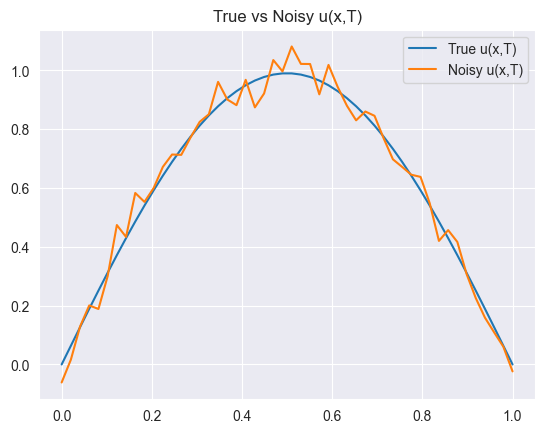

In [14]:
plt.plot(x, u[-1, :], label='True u(x,T)')
plt.plot(x, u_noisy, label='Noisy u(x,T)')
plt.legend()
plt.title('True vs Noisy u(x,T)')
plt.show()

## Create class for Neural Networdk

## import tensorflow for creating model

In [15]:
import tensorflow as tf

## Optimizer

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

## Loss Function Custom

In [17]:
# def custom_loss(y_true, y_pred, model, lam):
#
#     # This we need calculate MSE
#     mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
#
#     # Find Regularization term
#     reg_term = 0.0
#     for param in model.trainable_variables:
#         reg_term += tf.nn.l2_loss(param)
#
#     # AAAANND return Loss Function
#     return mse_loss + lam * reg_term

# и она не работает к сожалению

## I won't use my custom function because it makes a million problems

## Model

In [18]:
## FeedForward Neural Network

model = tf.keras.Sequential(
    [
        # Input Layer
        tf.keras.Input(shape=(Nx,)),

        # Hidden Layers With Regularization
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-5)),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-5)),

        # Output Layer
        tf.keras.layers.Dense(Nx)
    ]
)

## Convert Our Matrix or Data (it doesn't matter) to tensor Data

In [19]:
# copy of our function for usability
u_initial = np.sin(np.pi * x)

In [20]:
# Convert to list in order to convert future list into tensor
u_noisy_list = u_noisy.reshape(1, -1).tolist()
u_initial_list = u_initial.reshape(1, -1).tolist()

In [21]:
# Еле решил проблему с типами данных и этим одномерным массивом который нужно отнести к тензору, пойду попью чай
u_noisy_tensor = tf.convert_to_tensor(u_noisy_list, dtype=tf.float32)
u_initial_tensor = tf.convert_to_tensor(u_initial_list, dtype=tf.float32)

In [22]:
# What we will be use
model.compile(
    # And this is Adam optimizer
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    # Loss Function MSE
    loss='mean_squared_error'
)

In [23]:
# AND here will be fiiting
history = model.fit(u_noisy_tensor, u_initial_tensor, epochs=num_epochs)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.6040
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.5317
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.4709
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.4215
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.3779
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.3389
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.3037
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2715
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.2423
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 0.2155
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1906
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.1675
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.1460
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.1263
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1086
Epoch 16/500
1/1

In [24]:
predict = model(u_noisy_tensor).numpy().flatten()

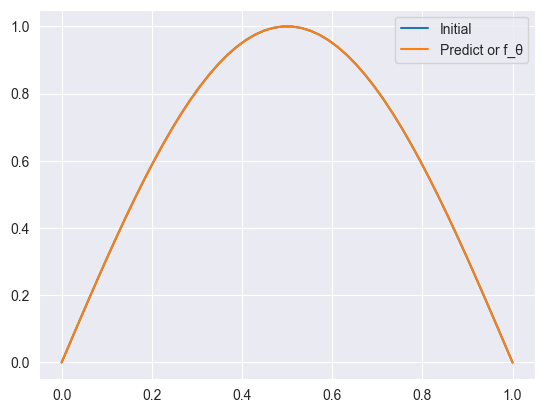

In [25]:
plt.plot(x, u_initial, label='Initial')
plt.plot(x, predict, label='Predict or f_θ')
plt.legend()
plt.show()

The model took the "noisy" data as input and trained on its basis to restore the initial temperature distribution.
The graph shows that the orange line (predicted by the model) almost exactly matches the blue line (the true initial distribution). This means that the neural network has coped well with the task.

## Second Variant

In [26]:
learning_rate = 0.1 # decrease
num_epochs = 500 # nothing happen (chilling)
l2_reg = 1e-4 # add this
hidden_layers = 3 # make more usable
hidden_units = 256 # increase

In [27]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(Nx,)))

In [28]:
for _ in range(hidden_layers):
    model.add(tf.keras.layers.Dense(hidden_units, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))

In [29]:
model.add(tf.keras.layers.Dense(Nx))

In [30]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='mean_squared_error'
)

history = model.fit(
    u_noisy_tensor,
    u_initial_tensor,
    epochs=num_epochs
)

predicted = model(u_noisy_tensor).numpy().flatten()

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.6471
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 446696.3125
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 1906.5454
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 4832.6348
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 145795.4844
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1224.0576
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 6.6669
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 10.4364
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 78.4692
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 1.5690
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 62.6515
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 282.2190
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 8.2389
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 244.9009
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - los

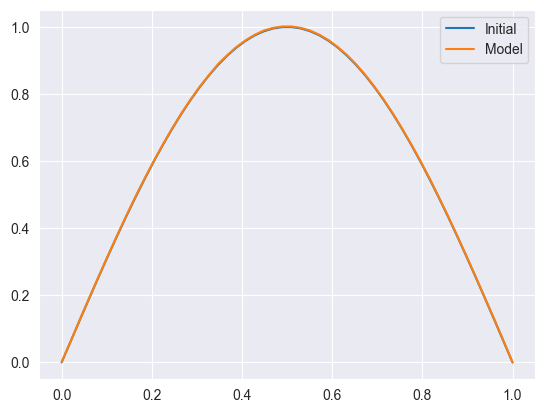

In [31]:
plt.plot(x, u_initial, label='Initial')
plt.plot(x, predicted, label='Model')
plt.legend()
plt.show()

## If we change the parameters Lambda nothing happen